# Election 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv('election1216.csv')

df.head()

,fips_code,county,st,total_2008,dem_2008,gop_2008,oth_2008,total_2012,dem_2012,gop_2012,...,exports_2012,pop_2012,exports_2013,pop_2013,exports_2014,pop_2014,exports_2015,pop_2015,exports_2016,pop_2016
0,1001,"Autauga County, Alabama",AL,23641,6093,17403,145,23909,6354,17366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003,"Baldwin County, Alabama",AL,81413,19386,61271,756,84988,18329,65772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005,"Barbour County, Alabama",AL,11630,5697,5866,67,11459,5873,5539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007,"Bibb County, Alabama",AL,8644,2299,6262,83,8391,2200,6131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1009,"Blount County, Alabama",AL,24267,3522,20389,356,23980,2961,20741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#All of the columns
print(df.columns)

Index(['fips_code', 'county', 'st', 'total_2008', 'dem_2008', 'gop_2008',
       'oth_2008', 'total_2012', 'dem_2012', 'gop_2012', 'oth_2012',
       'total_2016', 'dem_2016', 'gop_2016', 'oth_2016', 'labor_force_13',
       'labor_force_16', 'u_rate_13', 'u_rate_16', 'avg_total_wages_13',
       'avg_total_wages_16', 'avg_pm_wages_13', 'avg_pm_wages_16',
       'exports_2012', 'pop_2012', 'exports_2013', 'pop_2013', 'exports_2014',
       'pop_2014', 'exports_2015', 'pop_2015', 'exports_2016', 'pop_2016'],
      dtype='object')


### Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features.

+ ###  Outcome Variable
    - 'dem_2016'

+ ### Categorical Variable
    - 'st'
    
+ ### Continuous Variables
    - 'dem_2016'
    - 'gop_2016'
    - 'u_rate_13'
    - 'avg_total_wages_13'
    - 'u_rate_16'
    - 'avg_total_wages_16'

6 states flipped to the GOP in 2016: Florida, Iowa, Michigan, Ohio, Pennsylvania, and Wisconsin. Let's focus on the Rust Belt states (OH and PA) and take a closer look.

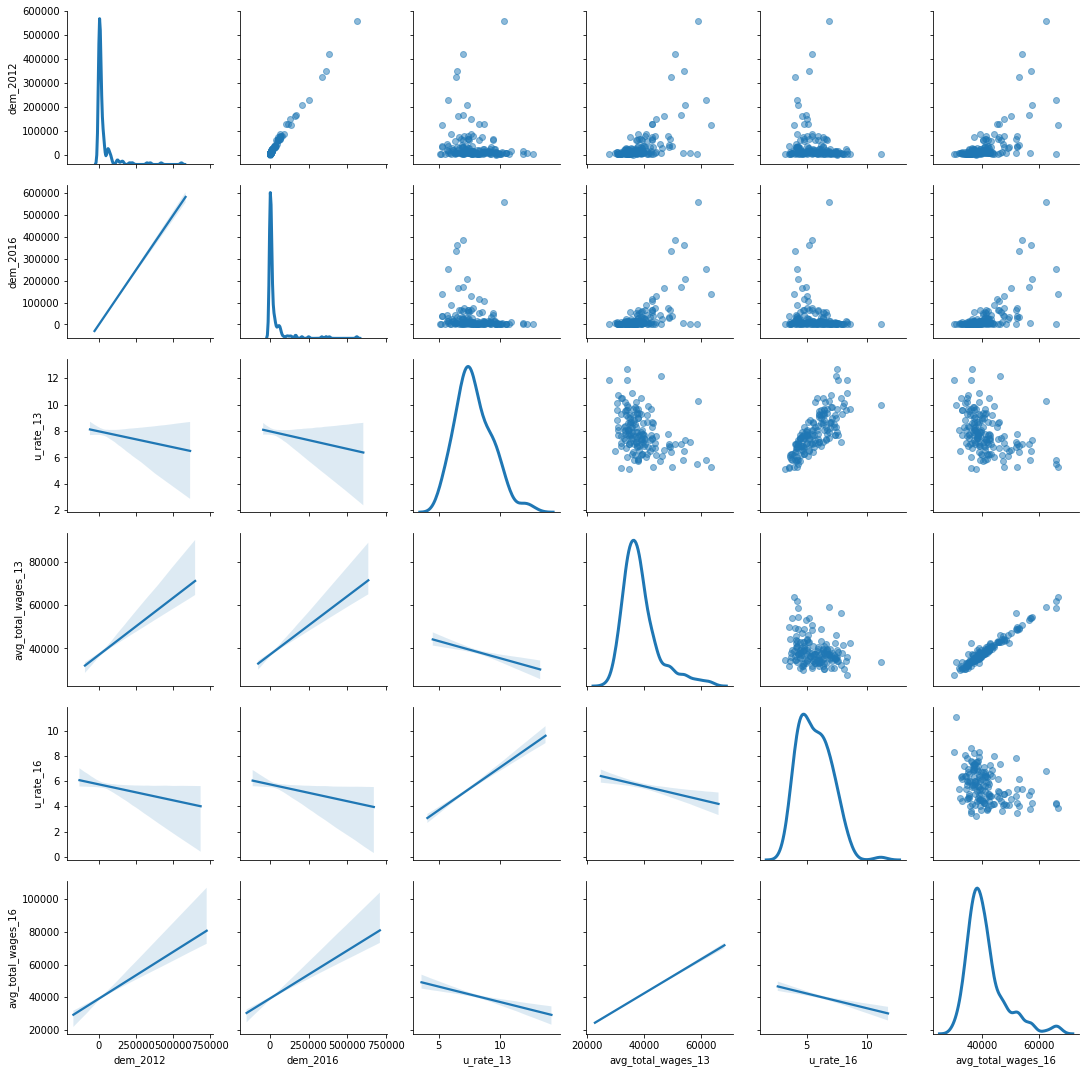

In [4]:
#Taking a subset of the data
df_rust = df.loc[
    ((df['st'] == 'PA') | (df['st'] == 'OH')),
    ['st', 'dem_2012', 'dem_2016', 'u_rate_13', 'avg_total_wages_13', 'u_rate_16', 'avg_total_wages_16']
]

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_rust.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                    dem_2012  dem_2016  u_rate_13  avg_total_wages_13  \
dem_2012            1.000000  0.996887  -0.118964            0.603211   
dem_2016            0.996887  1.000000  -0.132015            0.622363   
u_rate_13          -0.118964 -0.132015   1.000000           -0.367074   
avg_total_wages_13  0.603211  0.622363  -0.367074            1.000000   
u_rate_16          -0.140154 -0.148558   0.759125           -0.257155   
avg_total_wages_16  0.613747  0.632822  -0.408326            0.971924   

                    u_rate_16  avg_total_wages_16  
dem_2012            -0.140154            0.613747  
dem_2016            -0.148558            0.632822  
u_rate_13            0.759125           -0.408326  
avg_total_wages_13  -0.257155            0.971924  
u_rate_16            1.000000           -0.351769  
avg_total_wages_16  -0.351769            1.000000  


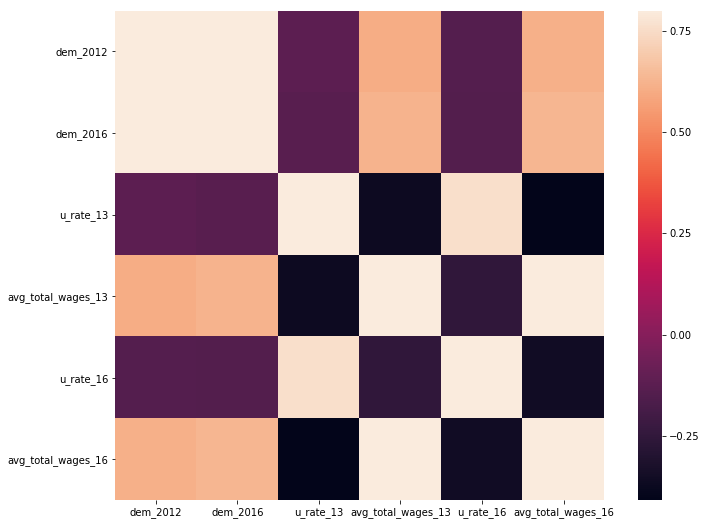

In [5]:
# Make the correlation matrix.
corrmat = df_rust.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

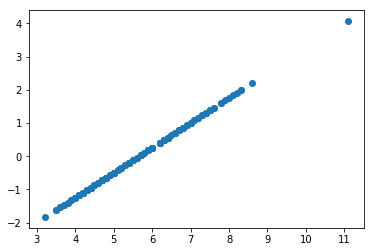

           dem_2012      dem_2016     u_rate_13  avg_total_wages_13  \
count  1.550000e+02  1.550000e+02  1.550000e+02        1.550000e+02   
mean   4.548333e-17 -2.113005e-17  1.067247e-16        3.373645e-16   
std    1.003241e+00  1.003241e+00  1.003241e+00        1.003241e+00   
min   -4.819041e-01 -4.446233e-01 -1.872538e+00       -1.746416e+00   
25%   -4.160814e-01 -3.978146e-01 -6.673751e-01       -6.550157e-01   
50%   -3.404393e-01 -3.407950e-01 -1.317472e-01       -2.185489e-01   
75%   -6.583503e-02 -9.024995e-02  6.047412e-01        3.357810e-01   
max    7.074120e+00  7.140020e+00  3.215927e+00        3.846486e+00   

          u_rate_16  avg_total_wages_16  
count  1.550000e+02        1.550000e+02  
mean  -5.873438e-17       -1.933937e-17  
std    1.003241e+00        1.003241e+00  
min   -1.842539e+00       -1.608350e+00  
25%   -7.931141e-01       -6.123616e-01  
50%   -1.184835e-01       -2.880845e-01  
75%    7.060650e-01        2.713354e-01  
max    4.079218e+00     

In [6]:
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df_rust[['dem_2012', 'dem_2016', 'u_rate_13', 'avg_total_wages_13', 'u_rate_16', 'avg_total_wages_16']].dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)
df_scaled['st'] = df_rust['st']

# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['u_rate_16'], df_scaled['u_rate_16'])
plt.show()

# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

In [7]:
df_scaled['st'].astype(str)

0      nan
1      nan
2      nan
3      nan
4      nan
5      nan
6      nan
7      nan
8      nan
9      nan
10     nan
11     nan
12     nan
13     nan
14     nan
15     nan
16     nan
17     nan
18     nan
19     nan
20     nan
21     nan
22     nan
23     nan
24     nan
25     nan
26     nan
27     nan
28     nan
29     nan
      ... 
125    nan
126    nan
127    nan
128    nan
129    nan
130    nan
131    nan
132    nan
133    nan
134    nan
135    nan
136    nan
137    nan
138    nan
139    nan
140    nan
141    nan
142    nan
143    nan
144    nan
145    nan
146    nan
147    nan
148    nan
149    nan
150    nan
151    nan
152    nan
153    nan
154    nan
Name: st, Length: 155, dtype: object

In [12]:
df_scaled.head(10)

,dem_2012,dem_2016,u_rate_13,avg_total_wages_13,u_rate_16,avg_total_wages_16,st
0,-0.438715,-0.419922,3.215927,-0.731362,1.380696,-0.702006,NaN
1,-0.261993,-0.277431,-0.064794,0.077353,-0.493278,0.166908,NaN
2,-0.381320,-0.374339,0.136067,-0.672586,-0.493278,-0.528252,NaN
3,-0.179213,-0.245254,1.073416,-0.842695,0.256311,-0.829444,NaN
4,-0.256574,-0.240366,0.738648,-0.163194,0.406229,-0.195746,NaN
5,-0.414458,-0.399176,-1.336910,-0.117790,-1.467745,0.061899,NaN
6,-0.303321,-0.333807,0.269974,-0.441058,1.305737,-0.536845,NaN
7,-0.397074,-0.393149,1.542090,-0.833676,0.031434,-0.947562,NaN
8,0.314039,0.316870,-0.265654,0.624064,-0.943032,0.832066,NaN
9,-0.417813,-0.408669,0.002160,-0.253690,0.855983,-0.615493,NaN


In [15]:
# Descriptive statistics by group.
print(df_rust.groupby('st').describe())

# Test whether group differences are significant.
for col in df_rust.loc[:,'dem_2012':'avg_total_wages_16'].columns:
    print(col)
    print(stats.ttest_ind(
        df_rust[df_rust['st'] == 'PA'][col].dropna(),
        df_rust[df_rust['st'] == 'OH'][col].dropna()
    ))

   avg_total_wages_13                                                         \
                count          mean          std      min       25%      50%   
st                                                                             
OH               88.0  37704.659091  5216.345208  27580.0  34099.25  37160.0   
PA               67.0  40265.328358  7581.990327  29913.0  35269.00  37830.0   

                     avg_total_wages_16                ...  u_rate_13        \
        75%      max              count          mean  ...        75%   max   
st                                                     ...                    
OH  40009.5  54545.0               88.0  39910.079545  ...      9.025  12.7   
PA  42917.0  63549.0               67.0  42688.328358  ...      8.650  10.3   

   u_rate_16                                                   
       count      mean       std  min   25%  50%    75%   max  
st                                                             
OH      88.

### Are the wages and unemployment rates normally distributed?

Text(0.5,0,'Wages ($)')

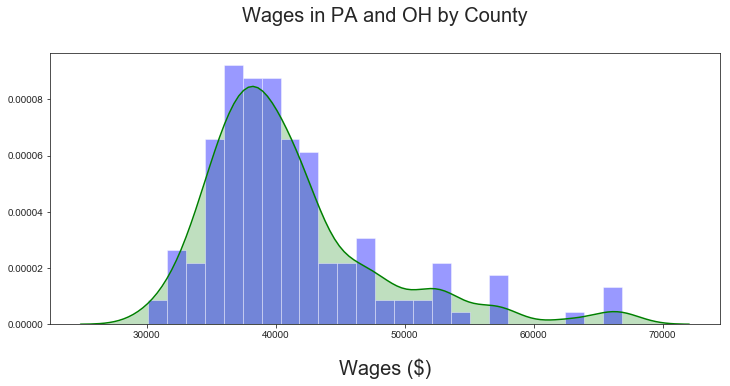

In [16]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
sns.set_style('ticks', {'xtick.major.size': 0.2})

g = plt.figure(figsize=(12,5))
plt.title('Wages in PA and OH by County', y=1.09)

axes = sns.distplot(df_rust['avg_total_wages_16'], hist=True, bins=25, color='b', 
                    kde_kws={'shade':True,'color':'g'})
plt.xlabel('Wages ($)', labelpad=18)

Text(0.5,0,'Unemployment Rate')

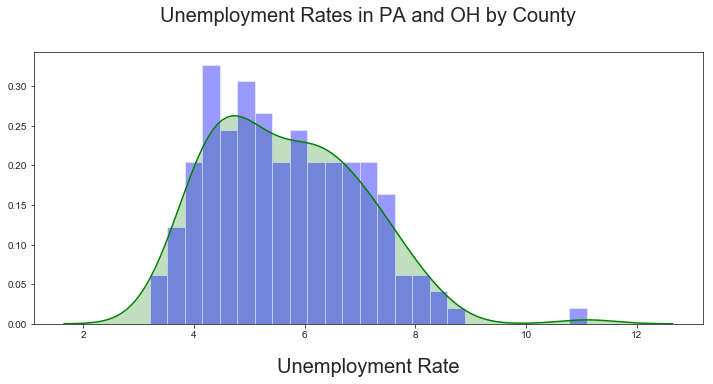

In [17]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
sns.set_style('ticks', {'xtick.major.size': 0.2})

g = plt.figure(figsize=(12,5))
plt.title('Unemployment Rates in PA and OH by County', y=1.09)

axes = sns.distplot(df_rust['u_rate_16'], hist=True, bins=25, color='b', 
                    kde_kws={'shade':True,'color':'g'})
plt.xlabel('Unemployment Rate', labelpad=18)

Text(0.5,1.09,'Unemployment Rates in PA and OH by County in 2016')

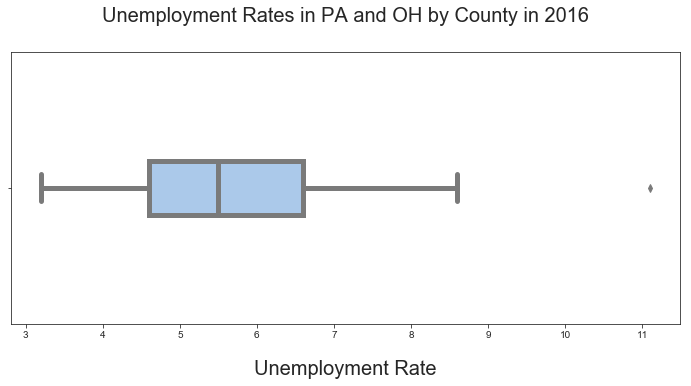

In [18]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.boxplot(y=df_rust['u_rate_16'], linewidth=5, width=0.2, palette='pastel', orient='h')

plt.xlabel('Unemployment Rate', labelpad=20)
plt.title('Unemployment Rates in PA and OH by County in 2016', y=1.09)

Text(0.5,1.09,'Unemployment in PA and OH by County in 2016')

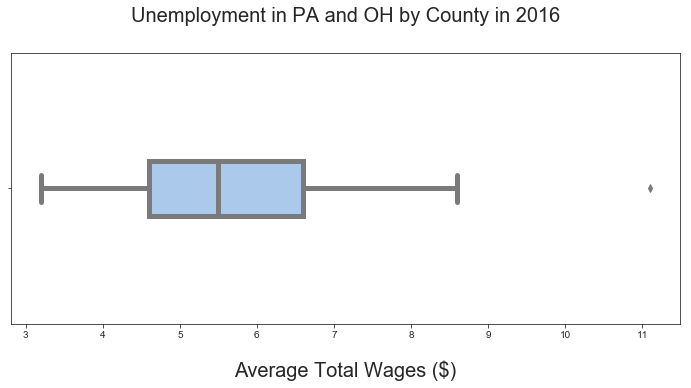

In [19]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.boxplot(y=df_rust['u_rate_16'], linewidth=5, width=0.2, palette='pastel', orient='h')

plt.xlabel('Average Total Wages ($)', labelpad=20)
plt.title('Unemployment in PA and OH by County in 2016', y=1.09)

In [20]:
features = pd.get_dummies(df_rust)
features['dem_diff'] = df_rust['dem_2016'] - df_rust['dem_2012']
features['u_diff'] = df_rust['u_rate_16'] - df_rust['u_rate_13']
features['wage_diff'] = df_rust['avg_total_wages_16'] - df_rust['avg_total_wages_13']
features['dem_pct_chg'] = features['dem_diff'] / df_rust['dem_2012'] * 100
features['u_pct_chg'] = features['u_diff'] / df_rust['u_rate_13'] * 100
features['wage_pct_chg'] = features['wage_diff'] / df_rust['avg_total_wages_13'] * 100

In [21]:
features.head()

,dem_2012,dem_2016,u_rate_13,avg_total_wages_13,u_rate_16,avg_total_wages_16,st_OH,st_PA,dem_diff,u_diff,wage_diff,dem_pct_chg,u_pct_chg,wage_pct_chg
2013,3857,2293,12.7,34108.0,7.5,36291.0,1,0,-1564,-5.2,2183.0,-40.549650,-40.944882,6.400258
2014,16869,12815,7.8,39309.0,5.0,42257.0,1,0,-4054,-2.8,2948.0,-24.032249,-35.897436,7.499555
2015,8083,5659,8.1,34486.0,5.0,37484.0,1,0,-2424,-3.1,2998.0,-29.988866,-38.271605,8.693383
2016,22964,15191,9.5,33392.0,6.0,35416.0,1,0,-7773,-3.5,2024.0,-33.848633,-36.842105,6.061332
2017,17268,15552,9.0,37762.0,6.2,39767.0,1,0,-1716,-2.8,2005.0,-9.937457,-31.111111,5.309570


Text(0.5,1.09,'Percentage Change for Democrats in PA and OH by County in 2016')

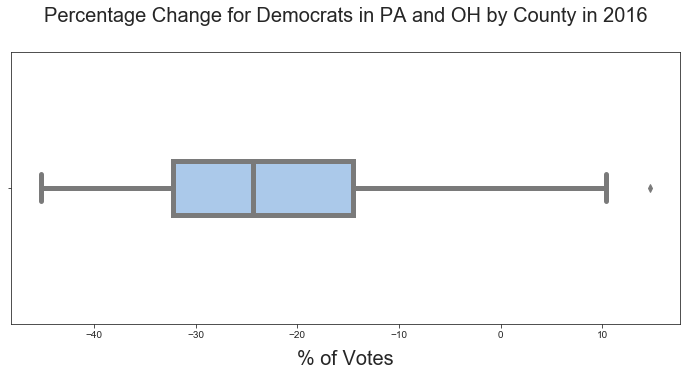

In [22]:
sns.set_context(rc={'axes.titlesize':20,'axes.labelsize':20})
plt.figure(figsize=(12,5))

sns.boxplot(y=features['dem_pct_chg'], linewidth=5, width=0.2, palette='pastel', orient='h')

plt.xlabel('% of Votes', labelpad=10)
plt.title('Percentage Change for Democrats in PA and OH by County in 2016', y=1.09)

                    dem_2012  dem_2016  u_rate_13  avg_total_wages_13  \
dem_2012            1.000000  0.996887  -0.118964            0.603211   
dem_2016            0.996887  1.000000  -0.132015            0.622363   
u_rate_13          -0.118964 -0.132015   1.000000           -0.367074   
avg_total_wages_13  0.603211  0.622363  -0.367074            1.000000   
u_rate_16          -0.140154 -0.148558   0.759125           -0.257155   
avg_total_wages_16  0.613747  0.632822  -0.408326            0.971924   
st_OH              -0.085744 -0.108203   0.136756           -0.197247   
st_PA               0.085744  0.108203  -0.136756            0.197247   
dem_diff           -0.002825  0.076027  -0.169887            0.265016   
u_diff             -0.009362 -0.001019  -0.484417            0.206711   
wage_diff           0.204856  0.209631  -0.271099            0.148192   
dem_pct_chg         0.515397  0.533736  -0.521053            0.641330   
u_pct_chg          -0.059756 -0.057258  -0.022563  

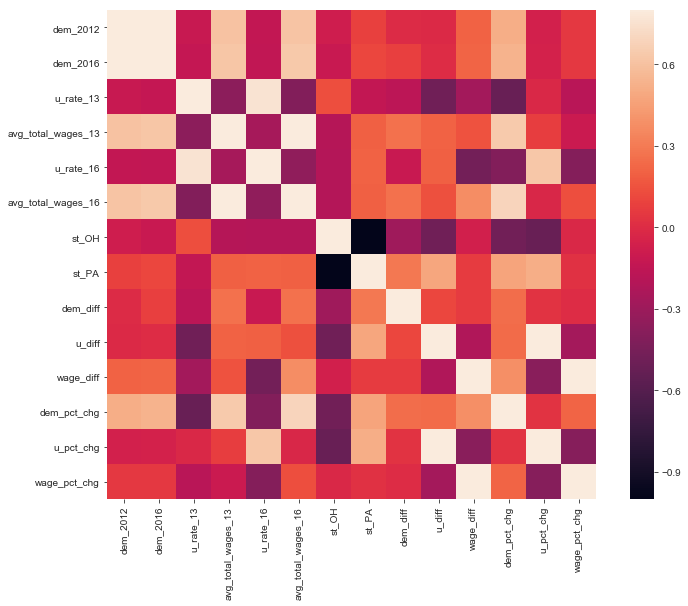

In [23]:
# Make the correlation matrix.
corrmat2 = features.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()